<a href="https://colab.research.google.com/github/Jithinkg/Predicting-Lungs-Disease/blob/master/Transfer_Learning_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [0]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Data/chest_xray/train'
valid_path = '/content/drive/My Drive/Data/chest_xray/test'


In [0]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [0]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [0]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Data/chest_xray/train/*')

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [0]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [0]:

# view the structure of the model
model.summary()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [0]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Data/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [0]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Data/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [0]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 3529s 22s/step - loss: 0.1924 - acc: 0.9237 - val_loss: 0.3641 - val_acc: 0.8718
Epoch 2/5
163/163 [==============================] - 115s 704ms/step - loss: 0.1040 - acc: 0.9605 - val_loss: 0.2347 - val_acc: 0.9087
Epoch 3/5
163/163 [==============================] - 120s 738ms/step - loss: 0.0997 - acc: 0.9611 - val_loss: 0.3027 - val_acc: 0.9022
Epoch 4/5
163/163 [==============================] - 121s 745ms/step - loss: 0.0854 - acc: 0.9663 - val_loss: 0.2824 - val_acc: 0.9135
Epoch 5/5
163/163 [==============================] - 122s 748ms/step - loss: 0.0807 - acc: 0.9668 - val_loss: 0.2760 - val_acc: 0.9151


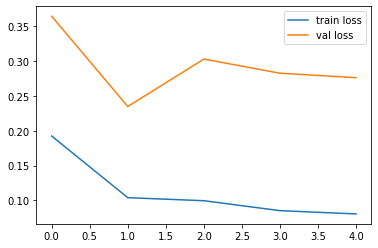

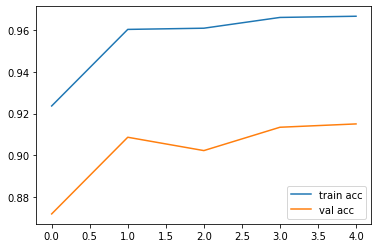

<Figure size 432x288 with 0 Axes>

In [0]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [0]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/My Drive/Colab Notebooks/model_vgg16.h5')

In [0]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3





In [0]:

from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.models import Sequential
model=load_model('/content/drive/My Drive/Colab Notebooks/model_vgg16.h5')
img=image.load_img('/content/drive/My Drive/Data/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',target_size=(224,224))
x=image.img_to_array(img)

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)

In [0]:
print(classes)

[[1. 0.]]
